In [228]:
import pandas as pd
file_path = '../MONDO_0004975_associations_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Step 2: Check column names to confirm correct p-value column
print(df.columns)

# Step 3: Filter SNPs with p-value < 1e-8
filtered_df = df[df['pValue'] < 1e-8]

# Step 4: Keep only variantId ending with -A, -T, -C, or -G (exclude -?)
filtered_df = filtered_df[filtered_df['riskAllele'].str.match(r'^rs\d+-[ATCG]$', na=False)]
#convert - to _
filtered_df['riskAllele'] = filtered_df['riskAllele'].str.replace('-', '_')
print(filtered_df['riskAllele'].head())
p_value5_id = filtered_df['riskAllele'].tolist()
# Step 5: Print the first 5 SNPs with p-value < 1e-8
print("SNPs with p-value < 1e-8:")
for snp in p_value5_id:
    print(snp)

Index(['riskAllele', 'pValue', 'pValueAnnotation', 'riskFrequency', 'orValue',
       'beta', 'ci', 'mappedGenes', 'traitName', 'efoTraits', 'bgTraits',
       'accessionId', 'locations', 'pubmedId', 'author'],
      dtype='object')
130    rs143332484_T
131       rs616338_T
133     rs75932628_T
136    rs139967528_G
183       rs593742_A
Name: riskAllele, dtype: object
SNPs with p-value < 1e-8:
rs143332484_T
rs616338_T
rs75932628_T
rs139967528_G
rs593742_A
rs7920721_G
rs138190086_A
rs114812713_C
rs11168036_T
rs283811_G
rs283811_G
rs483082_T
rs6857_T
rs11257238_T
rs41289512_G
rs4663105_C
rs2632516_C
rs9381563_C
rs4236673_A
rs11763230_T
rs7935829_G
rs1859788_A
rs6656401_A
rs6733839_T
rs9331896_C
rs983392_G
rs10792832_A
rs11218343_C
rs4147929_A
rs429358_C
rs429358_C
rs429358_C
rs429358_C
rs2075650_G
rs11754661_A
rs519113_G
rs115550680_G
rs6859_A
rs2373115_G
rs2718058_A
rs11218343_T
rs6656401_A
rs6733839_T
rs10948363_G
rs11771145_G
rs9331896_T
rs983392_A
rs10792832_G
rs4147929_A
rs1476679_T


In [229]:
import pandas as pd


In [230]:
data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)

/tmp/ipykernel_5906/738370358.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)


In [231]:
len(data_with_no_filtering.columns)

592538

In [232]:
id_of_pvalue5 = []
for col in data_with_no_filtering.columns:
    if col in p_value5_id:
        print(col, "is in the list")
        id_of_pvalue5.append(col)
print(id_of_pvalue5)


rs6882046_A is in the list
rs2718058_A is in the list
rs11771145_G is in the list
rs10498633_G is in the list
rs8106922_A is in the list
rs5167_T is in the list
['rs6882046_A', 'rs2718058_A', 'rs11771145_G', 'rs10498633_G', 'rs8106922_A', 'rs5167_T']


In [233]:
# read the data again with the selected columns and first 6 columns of data and first 5 rows
metadata_cols = ['IID', 'SEX', 'PHENOTYPE',]

# Combine metadata columns with your filtered SNP rsIDs
columns_to_use = metadata_cols + id_of_pvalue5

# Read only those columns (first 5 + selected SNPs) and first 5 rows
data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


/tmp/ipykernel_5906/990478919.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


In [234]:
#caclulate missing values of every column
missing_values = data_with_filtering.isnull().sum()
# Print the missing values
print("Missing values in each column:")
print(missing_values)
#see the minimum and median and maximum of the data


Missing values in each column:
IID             0
SEX             0
PHENOTYPE       0
rs6882046_A     2
rs2718058_A     1
rs11771145_G    0
rs10498633_G    0
rs8106922_A     0
rs5167_T        0
dtype: int64


In [235]:
# Load ADNIMERGE
# adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')
#mergre adni merge with data_with_filtering on IID and get just dx
# # Keep only relevant columns from ADNIMERGE
# adni_merge = adni_merge[['RID', 'VISCODE', 'DX']]   
# # Keep only baseline DX information
# adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# # Extract RID (subject ID) from IID (e.g., '014_S_0520' → 520)
# data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$').astype(float).astype(int)

# # Merge DX info
# data_with_filtering = pd.merge(data_with_filtering, adni_dx, on='RID', how='left')


In [236]:
# Load ADNIMERGE
adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')

# Filter to baseline diagnoses
adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# Extract RID from IID if needed (only if IID is like '014_S_0520')
data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$')[0].astype(int)

# Merge DX into your dataset
data_with_filtering = data_with_filtering.merge(adni_dx, on='RID', how='left')

# Drop RID if no longer needed
data_with_filtering.drop(columns=['RID'], inplace=True)

# Check merge result
print("Missing DX labels:", data_with_filtering['DX'].isna().sum())

Missing DX labels: 0


/tmp/ipykernel_5906/4016535944.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')


In [237]:
print(data_with_filtering.columns)


Index(['IID', 'SEX', 'PHENOTYPE', 'rs6882046_A', 'rs2718058_A', 'rs11771145_G',
       'rs10498633_G', 'rs8106922_A', 'rs5167_T', 'DX'],
      dtype='object')


In [238]:
columns_to_remove = [ 'IID','SEX','PHENOTYPE']  # Adjust the list based on your data

# Drop the specified columns
data_cleaned_with_just_dx_and_snp = data_with_filtering.drop(columns=columns_to_remove)
#convert data_cleaned_with_just_dx_and_snp to file

In [239]:
# Fill missing values with mode for all columns except 'DX'
for column in data_cleaned_with_just_dx_and_snp.columns:
    if column != 'DX':
        mode_value = data_cleaned_with_just_dx_and_snp[column].mode()[0]
        data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)

/tmp/ipykernel_5906/1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_5906/1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [240]:
# Map DX values to numerical values
dx_mapping = {'CN': 0, 'MCI': 0, 'Dementia': 1}
data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)

/tmp/ipykernel_5906/2107091537.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)


In [241]:
data_cleaned_with_just_dx_and_snp['DX'].value_counts()

DX
0    577
1    180
Name: count, dtype: int64

In [242]:
data_cleaned_with_just_dx_and_snp.dtypes

rs6882046_A     float64
rs2718058_A     float64
rs11771145_G      int64
rs10498633_G      int64
rs8106922_A       int64
rs5167_T          int64
DX                int64
dtype: object

In [243]:
#change all float64 columns to int64
for column in data_cleaned_with_just_dx_and_snp.columns:
    if data_cleaned_with_just_dx_and_snp[column].dtype == 'float64':
        data_cleaned_with_just_dx_and_snp[column] = data_cleaned_with_just_dx_and_snp[column].astype('int64')
#save the data_cleaned_with_just_dx_and_snp to a file

In [244]:
data_cleaned_with_just_dx_and_snp.dtypes 

rs6882046_A     int64
rs2718058_A     int64
rs11771145_G    int64
rs10498633_G    int64
rs8106922_A     int64
rs5167_T        int64
DX              int64
dtype: object

In [245]:
# balanced_data['DX'].value_counts()

In [246]:
# Get statistics of the data
data_cleaned_with_just_dx_and_snp.describe()
# balanced_data.describe()

,rs6882046_A,rs2718058_A,rs11771145_G,rs10498633_G,rs8106922_A,rs5167_T,DX
count,757.000000,757.000000,757.00000,757.000000,757.000000,757.000000,757.000000
mean,1.410832,1.250991,1.32893,1.614267,1.351387,1.211361,0.237781
std,0.647779,0.696089,0.66577,0.562691,0.655190,0.672772,0.426006
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,0.000000
max,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000


In [247]:
print("Baseline accuracy if always predict class 0:", round((577 / (577 + 180)) * 100, 2), "%")


Baseline accuracy if always predict class 0: 76.22 %


In [248]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Apply SMOTE to balance the classes (AD = 1)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the balanced data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train a model (e.g., Logistic Regression) on SMOTE data
logreg_smote = LogisticRegression(penalty='l2', random_state=42, solver='liblinear')
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg_smote.predict(X_test_smote)

# Evaluate
print("SMOTE Logistic Regression Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print("SMOTE Logistic Regression Classification Report:\n", classification_report(y_test_smote, y_pred_smote))

SMOTE Logistic Regression Accuracy: 0.5627705627705628
SMOTE Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       115
           1       0.57      0.54      0.56       116

    accuracy                           0.56       231
   macro avg       0.56      0.56      0.56       231
weighted avg       0.56      0.56      0.56       231



In [249]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Separate AD (DX==1) and CN+MCI (DX==0)
ad = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 1]
cn_mci = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 0]

# Downsample CN+MCI to match AD
cn_mci_downsampled = resample(
    cn_mci,
    replace=False,
    n_samples=len(ad),
    random_state=42
)

# Combine to create a balanced dataset
undersampled_data = pd.concat([ad, cn_mci_downsampled])
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X_under = undersampled_data.drop(columns=['DX'])
y_under = undersampled_data['DX']

# Train/test split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42
)

# Logistic Regression
logreg_under = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg_under.fit(X_train_under, y_train_under)
y_pred_logreg_under = logreg_under.predict(X_test_under)

print("Undersampled Logistic Regression Accuracy:", accuracy_score(y_test_under, y_pred_logreg_under))
print("Undersampled Logistic Regression Classification Report:\n", classification_report(y_test_under, y_pred_logreg_under))

# SVM
svm_under = SVC(kernel='linear', random_state=42)
svm_under.fit(X_train_under, y_train_under)
y_pred_svm_under = svm_under.predict(X_test_under)

print("Undersampled SVM Accuracy:", accuracy_score(y_test_under, y_pred_svm_under))
print("Undersampled SVM Classification Report:\n", classification_report(y_test_under, y_pred_svm_under))

Undersampled Logistic Regression Accuracy: 0.4583333333333333
Undersampled Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.41      0.47        41
           1       0.40      0.52      0.45        31

    accuracy                           0.46        72
   macro avg       0.47      0.47      0.46        72
weighted avg       0.47      0.46      0.46        72

Undersampled SVM Accuracy: 0.4444444444444444
Undersampled SVM Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.34      0.41        41
           1       0.40      0.58      0.47        31

    accuracy                           0.44        72
   macro avg       0.46      0.46      0.44        72
weighted avg       0.47      0.44      0.44        72



In [250]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Combine SMOTE (oversampling) and ENN (undersampling)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the combined balanced data
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Logistic Regression
logreg_comb = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg_comb.fit(X_train_comb, y_train_comb)
y_pred_logreg_comb = logreg_comb.predict(X_test_comb)
print("SMOTE+ENN Logistic Regression Accuracy:", accuracy_score(y_test_comb, y_pred_logreg_comb))
print("SMOTE+ENN Logistic Regression Classification Report:\n", classification_report(y_test_comb, y_pred_logreg_comb))

# SVM
svm_comb = SVC(kernel='linear', random_state=42)
svm_comb.fit(X_train_comb, y_train_comb)
y_pred_svm_comb = svm_comb.predict(X_test_comb)
print("SMOTE+ENN SVM ( linear ) Accuracy:", accuracy_score(y_test_comb, y_pred_svm_comb))
print("SMOTE+ENN SVM Classification Report:\n", classification_report(y_test_comb, y_pred_svm_comb))
# svm with rbf kernel
svm_comb_rbf = SVC(kernel='rbf', random_state=42)
svm_comb_rbf.fit(X_train_comb, y_train_comb)
y_pred_svm_comb_rbf = svm_comb_rbf.predict(X_test_comb)
print("SMOTE+ENN SVM (RBF) Accuracy:", accuracy_score(y_test_comb, y_pred_svm_comb_rbf))
print("SMOTE+ENN SVM (RBF) Classification Report:\n", classification_report(y_test_comb, y_pred_svm_comb_rbf))  
# svm with poly kernel
svm_comb_poly = SVC(kernel='poly', random_state=42)
svm_comb_poly.fit(X_train_comb, y_train_comb)
y_pred_svm_comb_poly = svm_comb_poly.predict(X_test_comb)
print("SMOTE+ENN SVM (Poly) Accuracy:", accuracy_score(y_test_comb, y_pred_svm_comb_poly))
print("SMOTE+ENN SVM (Poly) Classification Report:\n", classification_report(y_test_comb, y_pred_svm_comb_poly))
# Naive Bayes
nb_comb = GaussianNB()
nb_comb.fit(X_train_comb, y_train_comb)
y_pred_nb_comb = nb_comb.predict(X_test_comb)
print("SMOTE+ENN Naive Bayes Accuracy:", accuracy_score(y_test_comb, y_pred_nb_comb))
print("SMOTE+ENN Naive Bayes Classification Report:\n", classification_report(y_test_comb, y_pred_nb_comb))
# check mlp model with this balanced data
from sklearn.neural_network import MLPClassifier
mlp_comb = MLPClassifier(random_state=42)
mlp_comb.fit(X_train_comb, y_train_comb)
y_pred_mlp_comb = mlp_comb.predict(X_test_comb)
print("SMOTE+ENN MLP Accuracy:", accuracy_score(y_test_comb, y_pred_mlp_comb))
print("SMOTE+ENN MLP Classification Report:\n", classification_report(y_test_comb, y_pred_mlp_comb))

SMOTE+ENN Logistic Regression Accuracy: 0.6949152542372882
SMOTE+ENN Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        86
           1       0.00      0.00      0.00        32

    accuracy                           0.69       118
   macro avg       0.36      0.48      0.41       118
weighted avg       0.52      0.69      0.60       118

SMOTE+ENN SVM ( linear ) Accuracy: 0.7288135593220338
SMOTE+ENN SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        86
           1       0.00      0.00      0.00        32

    accuracy                           0.73       118
   macro avg       0.36      0.50      0.42       118
weighted avg       0.53      0.73      0.61       118

SMOTE+ENN SVM (RBF) Accuracy: 0.9576271186440678
SMOTE+ENN SVM (RBF) Classification Report:
               precision    recall  f1-score   su

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

SMOTE+ENN MLP Accuracy: 0.9067796610169492
SMOTE+ENN MLP Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.84      0.81      0.83        32

    accuracy                           0.91       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.91      0.91      0.91       118



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [251]:
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score,
    f1_score
)

# === 1. Balance the dataset using SMOTE + ENN === #
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)  # X, y must be pre-defined

# === 2. Train-test split === #
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# === 3. Feature scaling (IMPORTANT for SVM, MLP, Logistic Regression) === #
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# see data balance
print("Class distribution in training set:", pd.Series(y_train).value_counts())
print("Class distribution in test set:", pd.Series(y_test).value_counts())
# === 4. Define and train models === #
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    "SVM (Linear)": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "SVM (Poly)": SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(random_state=42, max_iter=500)
    
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # test with auroc
    from sklearn.metrics import roc_auc_score
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba)")


Class distribution in training set: DX
0    228
1     86
Name: count, dtype: int64
Class distribution in test set: DX
0    57
1    22
Name: count, dtype: int64

--- Logistic Regression ---
Accuracy: 0.6835
Balanced Accuracy: 0.7249
F1 Macro Score: 0.6662
Confusion Matrix:
 [[36 21]
 [ 4 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74        57
           1       0.46      0.82      0.59        22

    accuracy                           0.68        79
   macro avg       0.68      0.72      0.67        79
weighted avg       0.78      0.68      0.70        79

ROC AUC Score: 0.7576

--- SVM (Linear) ---
Accuracy: 0.6835
Balanced Accuracy: 0.7528
F1 Macro Score: 0.6733
Confusion Matrix:
 [[34 23]
 [ 2 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73        57
           1       0.47      0.91      0.62        22

    accuracy        

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Logistic Regression ---
Accuracy: 0.6835
Balanced Accuracy: 0.7249
F1 Macro Score: 0.6662


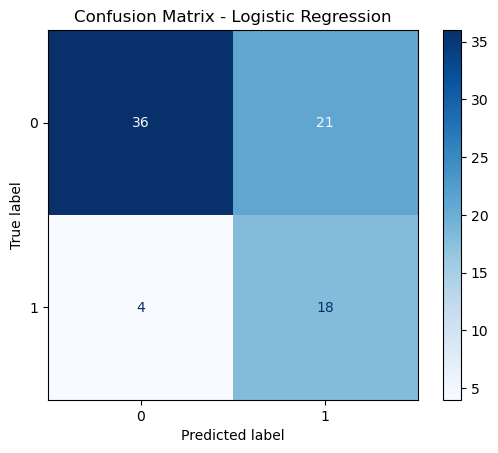

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74        57
           1       0.46      0.82      0.59        22

    accuracy                           0.68        79
   macro avg       0.68      0.72      0.67        79
weighted avg       0.78      0.68      0.70        79

ROC AUC Score: 0.7576

--- SVM (Linear) ---
Accuracy: 0.6835
Balanced Accuracy: 0.7528
F1 Macro Score: 0.6733


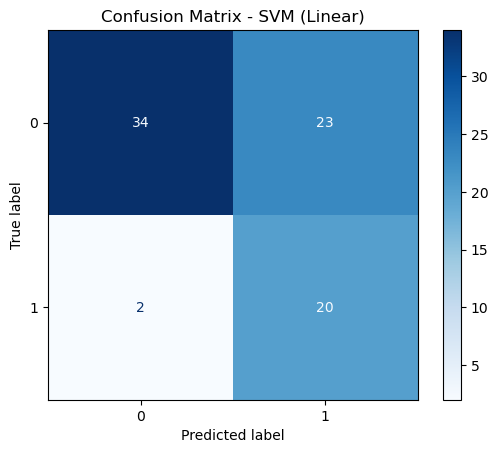

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73        57
           1       0.47      0.91      0.62        22

    accuracy                           0.68        79
   macro avg       0.70      0.75      0.67        79
weighted avg       0.81      0.68      0.70        79

ROC AUC Score: 0.756

--- SVM (RBF) ---
Accuracy: 0.9367
Balanced Accuracy: 0.9561
F1 Macro Score: 0.926


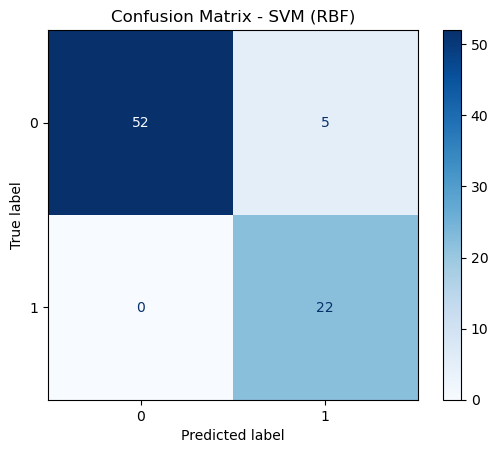

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        57
           1       0.81      1.00      0.90        22

    accuracy                           0.94        79
   macro avg       0.91      0.96      0.93        79
weighted avg       0.95      0.94      0.94        79

ROC AUC Score: 0.9952

--- SVM (Poly) ---
Accuracy: 0.9367
Balanced Accuracy: 0.9561
F1 Macro Score: 0.926


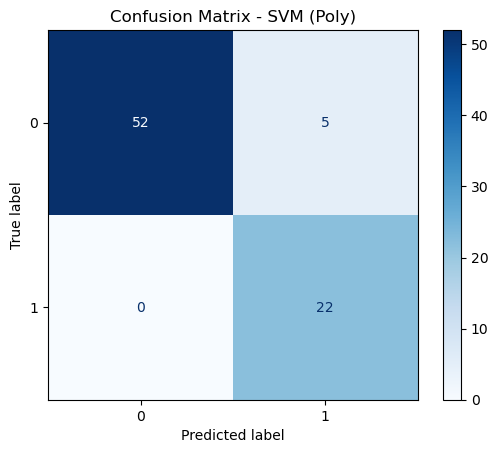

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        57
           1       0.81      1.00      0.90        22

    accuracy                           0.94        79
   macro avg       0.91      0.96      0.93        79
weighted avg       0.95      0.94      0.94        79

ROC AUC Score: 0.9681

--- Naive Bayes ---
Accuracy: 0.8101
Balanced Accuracy: 0.701
F1 Macro Score: 0.7247


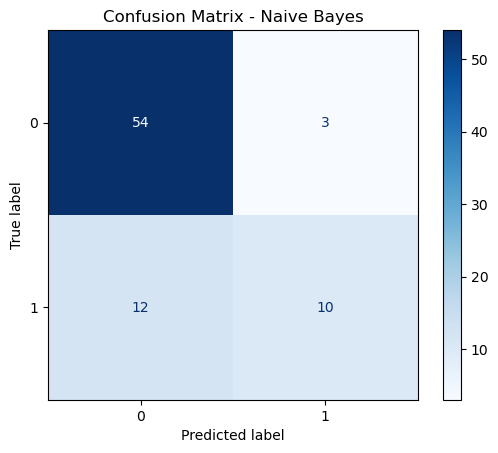

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        57
           1       0.77      0.45      0.57        22

    accuracy                           0.81        79
   macro avg       0.79      0.70      0.72        79
weighted avg       0.80      0.81      0.79        79

ROC AUC Score: 0.8668

--- MLP (Neural Net) ---


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.962
Balanced Accuracy: 0.9737
F1 Macro Score: 0.9546


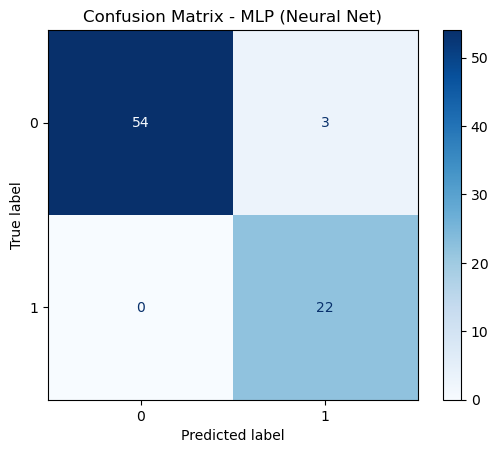

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        57
           1       0.88      1.00      0.94        22

    accuracy                           0.96        79
   macro avg       0.94      0.97      0.95        79
weighted avg       0.97      0.96      0.96        79

ROC AUC Score: 0.9864


In [252]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ROC AUC Score
    from sklearn.metrics import roc_auc_score
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba)")



--- Logistic Regression ---
Accuracy: 0.6835
Balanced Accuracy: 0.7249
F1 Macro Score: 0.6662


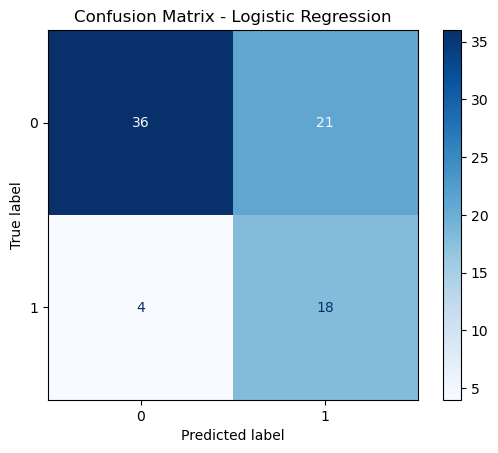

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74        57
           1       0.46      0.82      0.59        22

    accuracy                           0.68        79
   macro avg       0.68      0.72      0.67        79
weighted avg       0.78      0.68      0.70        79

ROC AUC Score: 0.7576


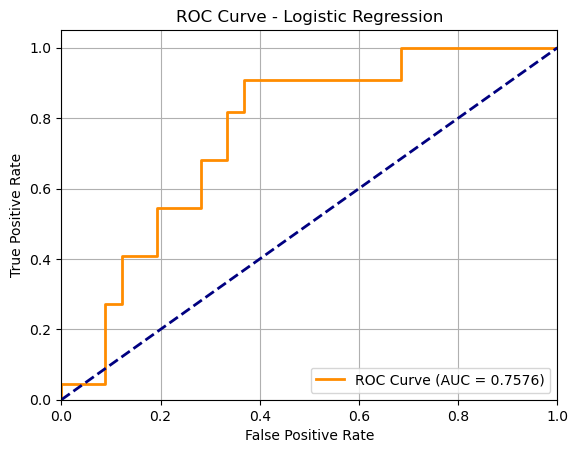


--- SVM (Linear) ---
Accuracy: 0.6835
Balanced Accuracy: 0.7528
F1 Macro Score: 0.6733


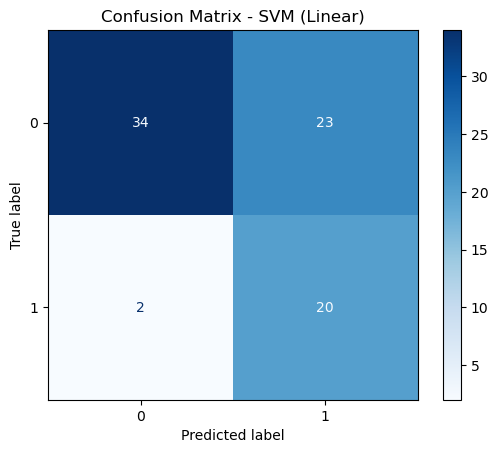

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73        57
           1       0.47      0.91      0.62        22

    accuracy                           0.68        79
   macro avg       0.70      0.75      0.67        79
weighted avg       0.81      0.68      0.70        79

ROC AUC Score: 0.756


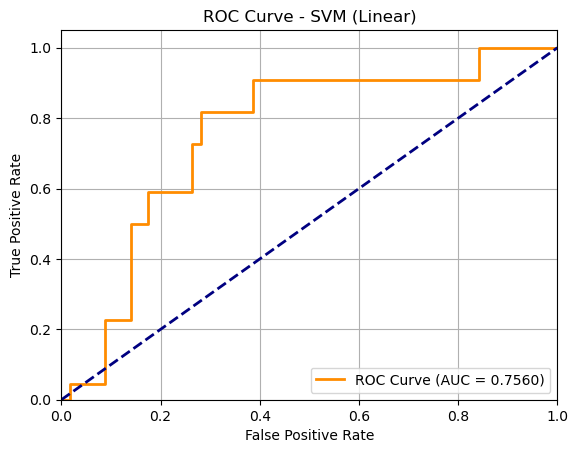


--- SVM (RBF) ---
Accuracy: 0.9367
Balanced Accuracy: 0.9561
F1 Macro Score: 0.926


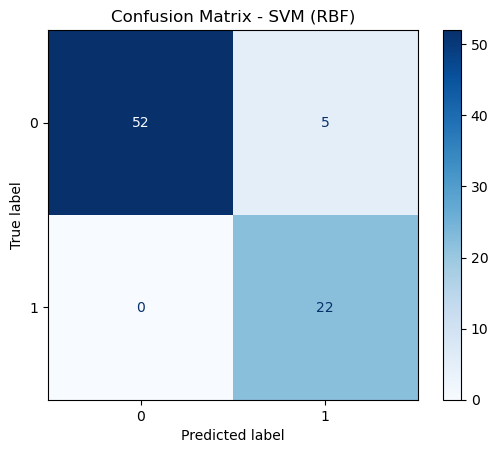

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        57
           1       0.81      1.00      0.90        22

    accuracy                           0.94        79
   macro avg       0.91      0.96      0.93        79
weighted avg       0.95      0.94      0.94        79

ROC AUC Score: 0.9952


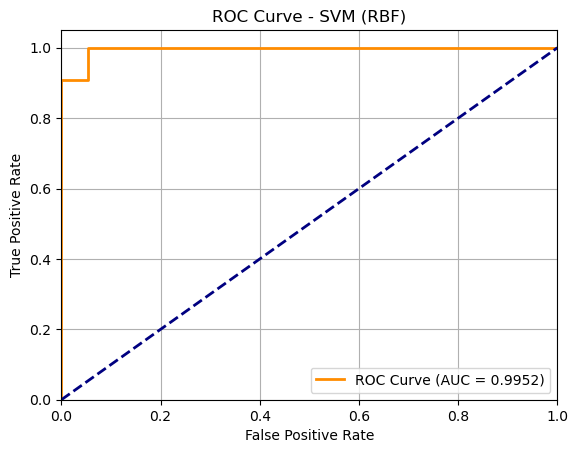


--- SVM (Poly) ---
Accuracy: 0.9367
Balanced Accuracy: 0.9561
F1 Macro Score: 0.926


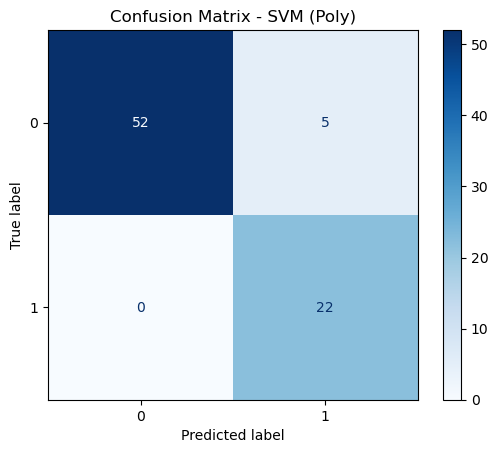

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        57
           1       0.81      1.00      0.90        22

    accuracy                           0.94        79
   macro avg       0.91      0.96      0.93        79
weighted avg       0.95      0.94      0.94        79

ROC AUC Score: 0.9681


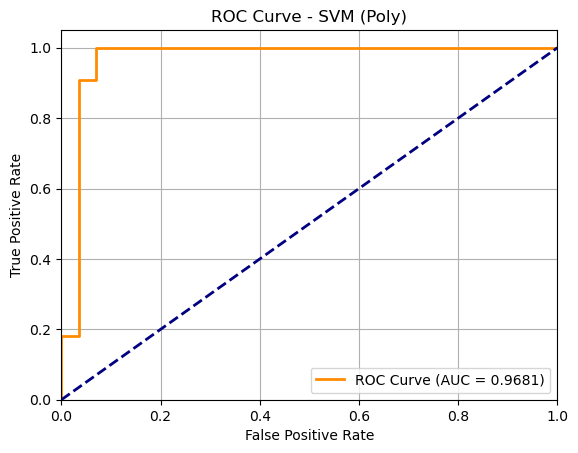


--- Naive Bayes ---
Accuracy: 0.8101
Balanced Accuracy: 0.701
F1 Macro Score: 0.7247


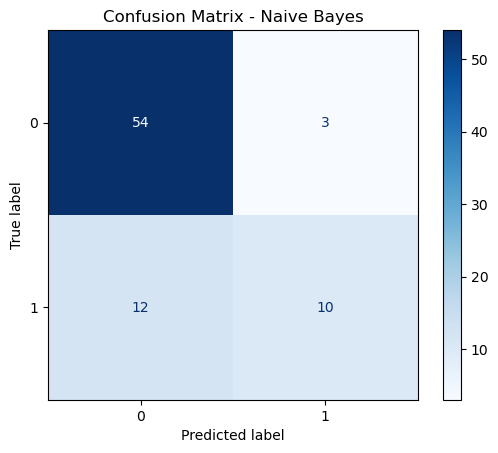

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        57
           1       0.77      0.45      0.57        22

    accuracy                           0.81        79
   macro avg       0.79      0.70      0.72        79
weighted avg       0.80      0.81      0.79        79

ROC AUC Score: 0.8668


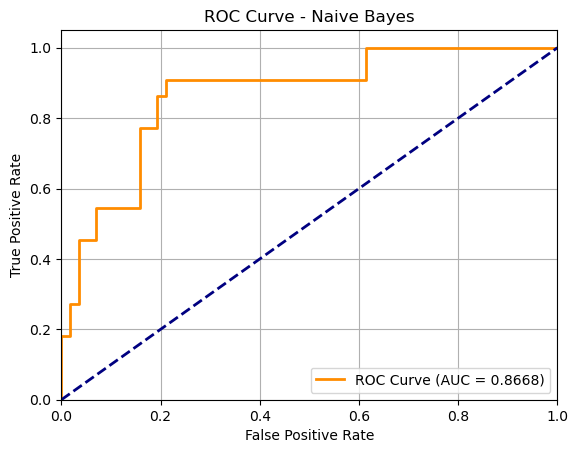


--- MLP (Neural Net) ---


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.962
Balanced Accuracy: 0.9737
F1 Macro Score: 0.9546


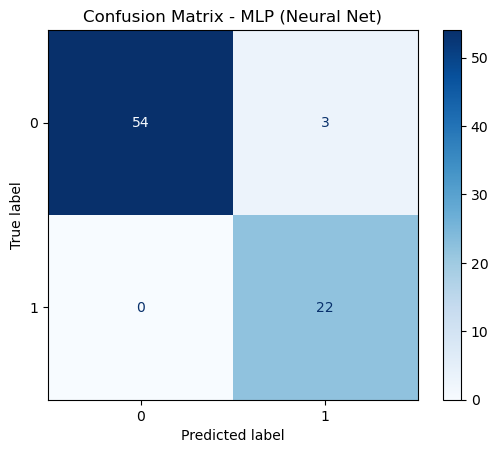

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        57
           1       0.88      1.00      0.94        22

    accuracy                           0.96        79
   macro avg       0.94      0.97      0.95        79
weighted avg       0.97      0.96      0.96        79

ROC AUC Score: 0.9864


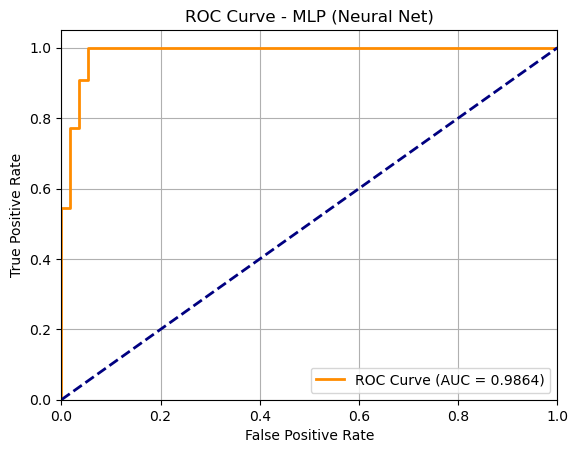

In [253]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))

    # === Plot Confusion Matrix === #
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))

    # === Plot ROC Curve with AUC === #
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        y_pred_proba = None

    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print("ROC AUC Score:", round(roc_auc, 4))

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba or decision_function)")



--- Logistic Regression ---
ROC AUC Score: 0.7576

--- SVM (Linear) ---
ROC AUC Score: 0.756

--- SVM (RBF) ---
ROC AUC Score: 0.9952

--- SVM (Poly) ---
ROC AUC Score: 0.9681

--- Naive Bayes ---
ROC AUC Score: 0.8668

--- MLP (Neural Net) ---


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC Score: 0.9864


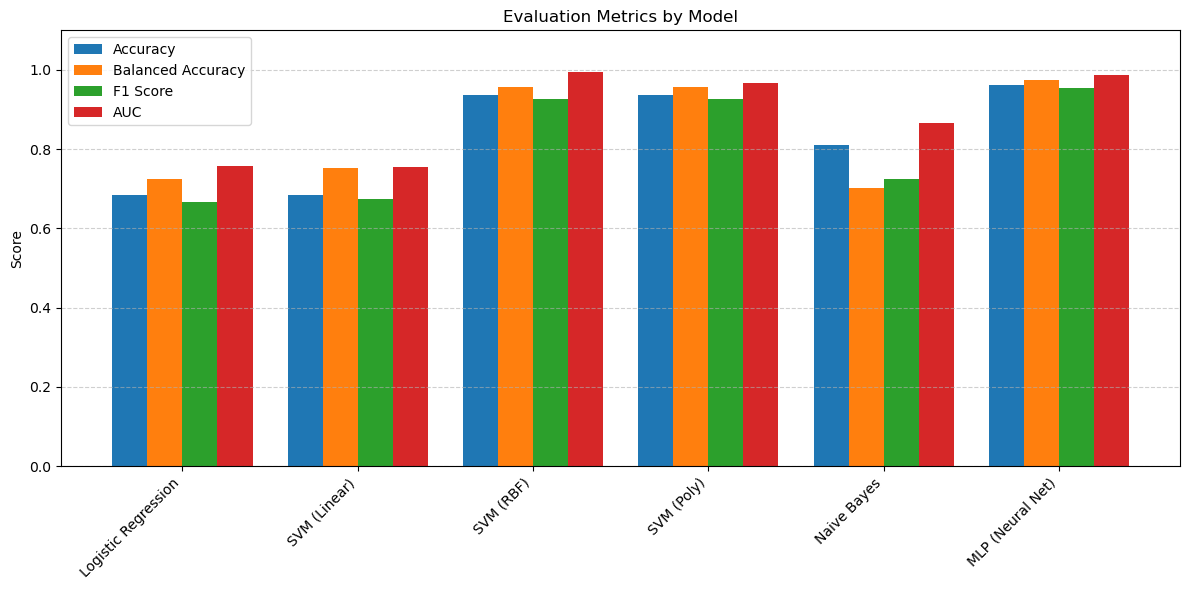

In [254]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    roc_auc_score
)

# To store metrics for the bar chart
results = {
    "Model": [],
    "Accuracy": [],
    "Balanced Accuracy": [],
    "F1 Score": [],
    "AUC": []
}

# === Evaluate each model and collect metrics === #
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    # ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        y_pred_proba = None

    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC Score:", round(auc, 4))
    else:
        auc = 0.0
        print("ROC AUC Score: Not available")

    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Balanced Accuracy"].append(bal_acc)
    results["F1 Score"].append(f1)
    results["AUC"].append(auc)

# === Create bar chart of metrics === #
df_results = pd.DataFrame(results)

metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC"]
x = range(len(df_results["Model"]))
bar_width = 0.2

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(
        [p + i * bar_width for p in x],
        df_results[metric],
        width=bar_width,
        label=metric
    )

plt.xticks([p + 1.5 * bar_width for p in x], df_results["Model"], rotation=45, ha='right')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Evaluation Metrics by Model")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



--- Logistic Regression ---
Average Precision (PR AUC): 0.5076


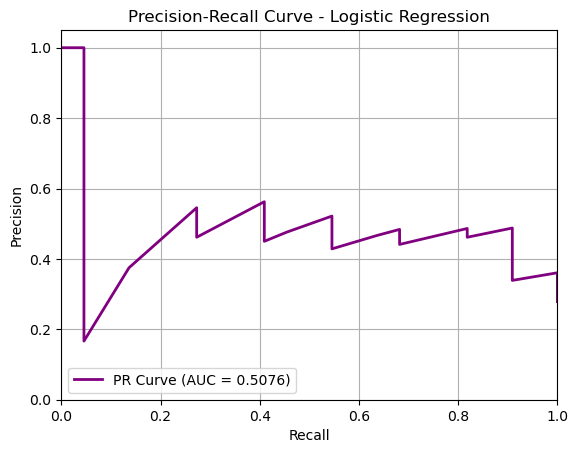


--- SVM (Linear) ---
Average Precision (PR AUC): 0.4903


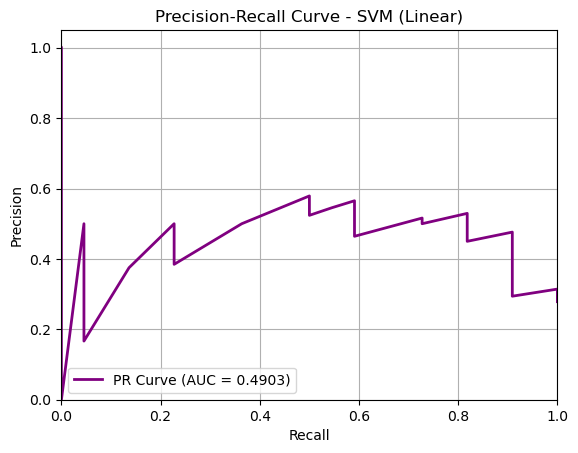


--- SVM (RBF) ---
Average Precision (PR AUC): 0.9891


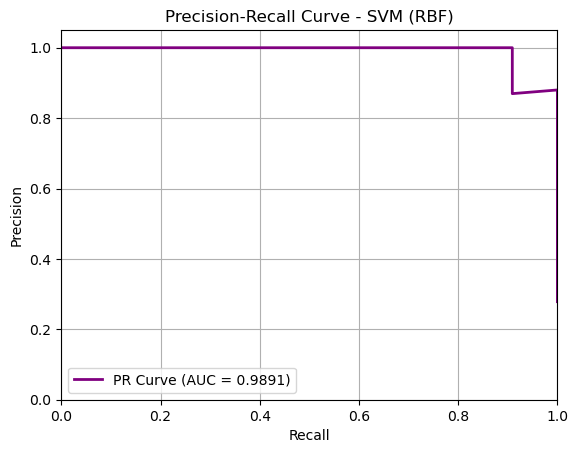


--- SVM (Poly) ---
Average Precision (PR AUC): 0.8805


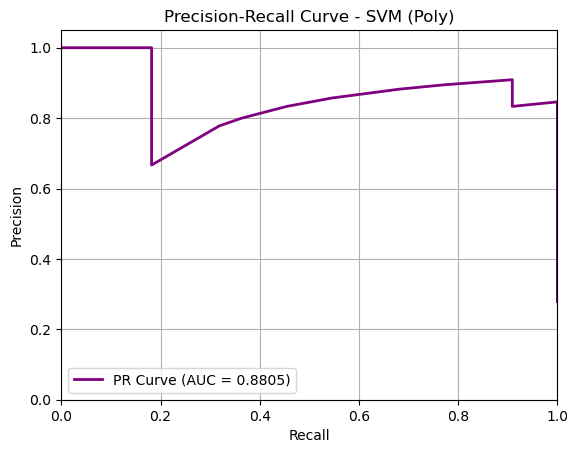


--- Naive Bayes ---
Average Precision (PR AUC): 0.7425


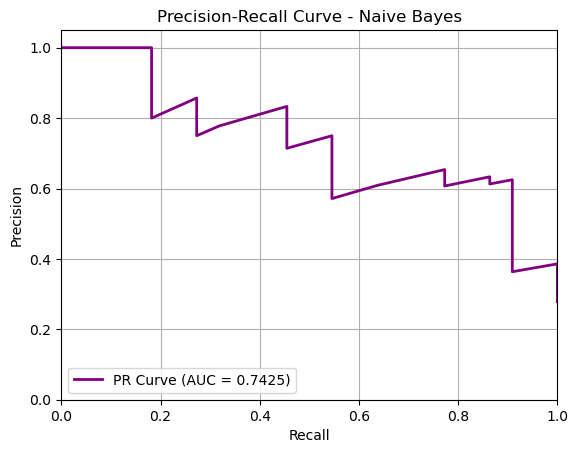


--- MLP (Neural Net) ---


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Precision (PR AUC): 0.9627


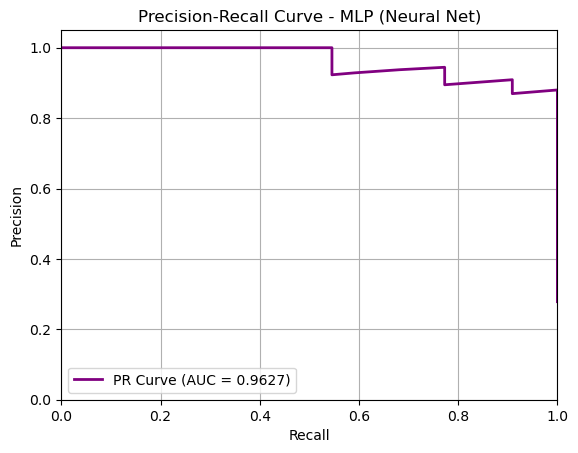

In [255]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score
)

# === Plot Precision-Recall Curve per model === #
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)

    # Predict probabilities or decision function scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = None

    if y_scores is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = average_precision_score(y_test, y_scores)

        print("Average Precision (PR AUC):", round(pr_auc, 4))

        # Plot PR Curve
        plt.figure()
        plt.plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {name}')
        plt.legend(loc="lower left")
        plt.grid(True)
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.show()
    else:
        print("PR Curve: Not available for this model (no predict_proba or decision_function)")


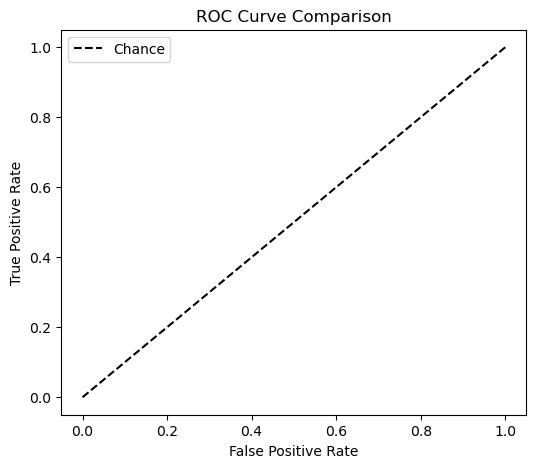

/tmp/ipykernel_5906/2508847177.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


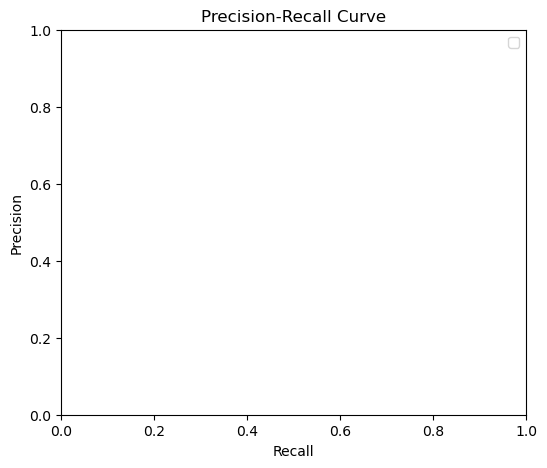

In [256]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt

# Assume y_test and model predictions/probabilities are available for each model
# Example: y_pred_logreg, y_pred_svm, y_pred_rf, y_pred_proba_logreg, etc.

# 1. Confusion Matrix (for each model)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 2. ROC Curve (with AUC score)
def plot_roc_curve(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(6, 5))
# Example usage for logistic regression:
# plot_roc_curve(y_test, y_pred_proba_logreg, 'Logistic Regression')
# plot_roc_curve(y_test, y_pred_proba_svm, 'SVM')
# plot_roc_curve(y_test, y_pred_proba_rf, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 3. Bar Chart of Evaluation Metrics
def plot_metrics_bar(metrics_dict):
    # metrics_dict: {'Model': {'Accuracy': ..., 'F1': ..., 'Balanced Acc': ..., 'AUC': ...}, ...}
    df_metrics = pd.DataFrame(metrics_dict).T
    df_metrics.plot(kind='bar', figsize=(8, 5))
    plt.title('Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# 4. Precision-Recall Curve (optional)
def plot_precision_recall(y_true, y_score, label):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    plt.plot(recall, precision, label=f'{label} (AP = {ap:.2f})')

plt.figure(figsize=(6, 5))
# plot_precision_recall(y_test, y_pred_proba_logreg, 'Logistic Regression')
# plot_precision_recall(y_test, y_pred_proba_svm, 'SVM')
# plot_precision_recall(y_test, y_pred_proba_rf, 'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM models with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train and evaluate each model
svm_models = {'Linear': svm_linear, 'Polynomial': svm_poly, 'RBF': svm_rbf}
for name, model in svm_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} SVM Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} SVM Classification Report:\n{classification_report(y_test, y_pred)}")
    # evaluate with ROC AUC
    from sklearn.metrics import roc_auc_score
    y_pred_proba = model.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{name} SVM ROC AUC Score: {roc_auc}")

Linear SVM Accuracy: 0.75
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.00      0.00      0.00        38

    accuracy                           0.75       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.56      0.75      0.64       152

Linear SVM ROC AUC Score: 0.49746075715604804
Polynomial SVM Accuracy: 0.75
Polynomial SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.00      0.00      0.00        38

    accuracy                           0.75       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.56      0.75      0.64       152

Polynomial SVM ROC AUC Score: 0.5832179132040628
RBF SVM Accuracy: 0.75
RBF SVM Classification Report:
              precision    recall  f1-score   support

           0  

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

RBF SVM ROC AUC Score: 0.5319713758079408


In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6842105263157895
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       114
           1       0.27      0.16      0.20        38

    accuracy                           0.68       152
   macro avg       0.51      0.51      0.50       152
weighted avg       0.63      0.68      0.65       152



In [259]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# X_train, X_test, y_train, y_test are already defined

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7039473684210527
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       114
           1       0.32      0.16      0.21        38

    accuracy                           0.70       152
   macro avg       0.54      0.52      0.51       152
weighted avg       0.65      0.70      0.67       152

Gradient Boosting Accuracy: 0.7236842105263158
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       114
           1       0.25      0.05      0.09        38

    accuracy                           0.72       152
   macro avg       0.50      0.50      0.46       152
weighted avg       0.62      0.72      0.65       152

AdaBoost Accuracy: 0.75
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.0

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-package

In [260]:
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE
# import pandas as pd
# from sklearn.svm import SVC

# # Random Sub-Sampling
# # Separate classes
# class_0 = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 0]
# class_1 = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 1]
# class_2 = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 2]

# # Downsample majority classes to match the minority class size
# min_class_size = min(len(class_0), len(class_1), len(class_2))
# class_0_downsampled = resample(class_0, replace=False, n_samples=min_class_size, random_state=42)
# class_1_downsampled = resample(class_1, replace=False, n_samples=min_class_size, random_state=42)
# class_2_downsampled = resample(class_2, replace=False, n_samples=min_class_size, random_state=42)

# # Combine downsampled classes
# balanced_data_subsampling = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
# print("Random Sub-Sampling Balanced Data:")
# print(balanced_data_subsampling['DX'].value_counts())

# # Oversampling using SMOTE
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']
# smote = SMOTE(random_state=42)
# X_oversampled, y_oversampled = smote.fit_resample(X, y)

# # Combine oversampled data into a DataFrame
# balanced_data_oversampling = pd.concat([pd.DataFrame(X_oversampled, columns=X.columns), pd.Series(y_oversampled, name='DX')], axis=1)
# print("\nSMOTE Oversampling Balanced Data:")
# print(balanced_data_oversampling['DX'].value_counts())

# # Class-Weighted Model (Example: SVM with class weights)
# class_weights = {0: 1.0, 1: 1.5, 2: 2.0}  # Adjust weights based on class imbalance
# svm_model = SVC(kernel='linear', class_weight=class_weights, random_state=42)
# svm_model.fit(X, y)

# print("\nClass-Weighted SVM Model Trained.")

In [261]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Define a function to train and evaluate models
# def evaluate_models(X_train, X_test, y_train, y_test):
#     models = {
#         "SVM": SVC(kernel='linear', random_state=42),
#         "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
#         "Random Forest": RandomForestClassifier(random_state=42)
#     }
    
#     results = {}
#     for name, model in models.items():
#         # Train the model
#         model.fit(X_train, y_train)
        
#         # Predict on the test set
#         y_pred = model.predict(X_test)
        
#         # Evaluate the model
#         accuracy = accuracy_score(y_test, y_pred)
#         report = classification_report(y_test, y_pred)
        
#         results[name] = {
#             "Accuracy": accuracy,
#             "Classification Report": report
#         }
        
#         print(f"{name} Results:")
#         print(f"Accuracy: {accuracy}")
#         print("Classification Report:")
#         print(report)
#         print("-" * 50)
    
#     return results

# # Evaluate on subsampling balanced data
# print("Evaluating on Subsampling Balanced Data:")
# X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
#     balanced_data_subsampling.drop(columns=['DX']),
#     balanced_data_subsampling['DX'],
#     test_size=0.2,
#     random_state=42
# )
# results_subsampling = evaluate_models(X_train_sub, X_test_sub, y_train_sub, y_test_sub)

# # Evaluate on SMOTE balanced data
# print("\nEvaluating on SMOTE Balanced Data:")
# X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
#     X_oversampled,
#     y_oversampled,
#     test_size=0.2,
#     random_state=42
# )
# results_smote = evaluate_models(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

In [262]:
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Random Sub-Sampling
# # Separate classes
# class_0 = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 0]
# class_1 = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 1]
# class_2 = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == 2]

# # Downsample majority classes to match the minority class size
# min_class_size = min(len(class_0), len(class_1), len(class_2))
# class_0_downsampled = resample(class_0, replace=False, n_samples=min_class_size, random_state=42)
# class_1_downsampled = resample(class_1, replace=False, n_samples=min_class_size, random_state=42)
# class_2_downsampled = resample(class_2, replace=False, n_samples=min_class_size, random_state=42)

# # Combine downsampled classes
# balanced_data_subsampling = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
# balanced_data_subsampling["DX"].value_counts()
# # Oversampling using SMOTE
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']
# smote = SMOTE(random_state=42)
# X_oversampled, y_oversampled = smote.fit_resample(X, y)

# # Class-Weighted Model (SVM with class weights)
# class_weights = {0: 1.0, 1: 1.5, 2: 2.0}  # Adjust weights based on class imbalance
# svm_model = SVC(kernel='linear', class_weight=class_weights, random_state=42)
# svm_model.fit(X_train, y_train)

# # Evaluate the SVM model
# y_pred_svm = svm_model.predict(X_test)
# print("SVM with Class Weights - Classification Report:")
# print(classification_report(y_test, y_pred_svm))

# # Class-Weighted Model (Random Forest with class weights)
# rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)

# # Evaluate the Random Forest model
# y_pred_rf = rf_model.predict(X_test)
# print("Random Forest with Class Weights - Classification Report:")
# print(classification_report(y_test, y_pred_rf))

In [263]:
# balanced_data_subsampling["DX"].value_counts()

In [264]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Initialize StratifiedKFold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Store results for each fold
# fold_accuracies = []
# best_split = None
# best_accuracy = 0

# # Perform k-fold cross-validation
# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     # Train a model (e.g., Logistic Regression)
#     model = LogisticRegression(random_state=42, solver='liblinear')
#     model.fit(X_train, y_train)
    
#     # Evaluate the model
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     fold_accuracies.append(accuracy)
    
#     # Check if this is the best split
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_split = (train_index, test_index)

# # Print results
# print("Fold Accuracies:", fold_accuracies)
# print("Best Accuracy:", best_accuracy)
# print("Best Split Indices:", best_split)

In [265]:
# # balance the 3 classes of dx
# import numpy as np
# import random
# # Set a random seed for reproducibility
# random.seed(42)
# # Get the counts of each class
# class_counts = data_cleaned_with_just_dx_and_snp['DX'].value_counts()
# # Find the minimum class count
# min_count = class_counts.min()
# # Create a balanced DataFrame
# balanced_data = pd.DataFrame()
# for dx_class in class_counts.index:
#     # Get the rows for the current class
#     class_rows = data_cleaned_with_just_dx_and_snp[data_cleaned_with_just_dx_and_snp['DX'] == dx_class]
#     # Randomly sample rows to match the minimum count
#     sampled_rows = class_rows.sample(n=min_count, random_state=42)
#     # Append the sampled rows to the balanced DataFrame
#     balanced_data = pd.concat([balanced_data, sampled_rows], ignore_index=True)
# # Shuffle the balanced DataFrame
# balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [266]:
# balanced_data['DX'].value_counts()

In [267]:
# # check the correlation of the data
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Calculate the correlation matrix
# correlation_matrix = balanced_data.corr()
# # Set the size of the plot
# plt.figure(figsize=(20, 20))
# # Create a heatmap
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# plt.title('Correlation Heatmap')
# plt.show()
# # save the plot to a image file
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

In [268]:
# # compute mutual information
# import pandas as pd
# from sklearn.feature_selection import mutual_info_classif

# # Assume df_bal is your balanced DataFrame (540×31), with 'dx' as target
# X = balanced_data.drop(columns='DX')
# y = balanced_data['DX']

# # Compute mutual information for each SNP
# mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)

# # Create a DataFrame of scores
# mi_df = pd.DataFrame({
#     'SNP': X.columns,
#     'MI Score': mi_scores
# }).sort_values('MI Score', ascending=False)

# print("Top SNPs by Mutual Information:")
# print(mi_df.head(15))


In [269]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, f1_score
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler

# # 1. Select top-15 SNPs
# top_snps = [
#     'rs7155434_A','rs9832461_A','rs474951_T','rs17022021_T','rs8106922_A',
#     'rs2970989_T','rs2718058_A','rs440277_G','rs5167_T','rs11771145_G',
#     'rs29745_A','rs6882046_A','rs1923775_T','rs2456930_G','rs17785248_A'
# ]

# X = balanced_data[top_snps].copy()
# y = balanced_data['DX'].copy()

# # 2. Train/Test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # 3. (Optional) SMOTE on training set
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



# # 5. Train XGBoost
# model = XGBClassifier(
#     objective='multi:softprob',
#     num_class=3,
#     learning_rate=0.05,
#     n_estimators=200,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     eval_metric='mlogloss',
#     use_label_encoder=False,
#     random_state=42
# )
# model.fit(X_train_res, y_train_res)

# # 6. Evaluate
# y_pred = model.predict(X_test)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("Macro F1-score:", f1_score(y_test, y_pred, average='macro'))


In [270]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# from xgboost import XGBClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # X, y from your balanced df_bal
# X = balanced_data.drop(columns='DX')
# y = balanced_data['DX']

# # The list of k-values to try
# k_values = [10, 15, 20, 25, 30]

# # Use StratifiedKFold for balanced splits
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# results = []
# for k in k_values:
#     pipe = Pipeline([
#         ('select', SelectKBest(mutual_info_classif, k=k)),
#         ('scale', StandardScaler()),            # optional for trees
#         ('xgb', XGBClassifier(
#             objective='multi:softprob',
#             num_class=3,
#             learning_rate=0.05,
#             n_estimators=200,
#             max_depth=4,
#             subsample=0.8,
#             colsample_bytree=0.8,
#             eval_metric='mlogloss',
#             random_state=42
#         ))
#     ])
#     # Compute cross-val macro-F1
#     scores = cross_val_score(pipe, X, y, cv=cv, scoring='f1_macro', n_jobs=-1)
#     results.append({'k': k, 'mean_f1': np.mean(scores), 'std_f1': np.std(scores)})
#     print(f"k={k:2d} → macro-F1 = {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# # Turn into DataFrame for easy viewing
# results_df = pd.DataFrame(results).sort_values('mean_f1', ascending=False)
# print("\nBest k by macro-F1:\n", results_df.head())


In [271]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report

# Lasso Regression
lasso_model = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predict using Lasso
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso_rounded = [round(pred) for pred in y_pred_lasso]  # Round predictions to nearest integer

# Evaluate Lasso
lasso_accuracy = accuracy_score(y_test, y_pred_lasso_rounded)
print(f"Lasso Regression Accuracy: {lasso_accuracy}")

# Logistic Regression
logistic_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logistic_model.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Lasso Regression Accuracy: 0.75
Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.00      0.00      0.00        38

    accuracy                           0.75       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.56      0.75      0.64       152



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [272]:
# print("Confusion Matrix:")
# for row in conf_matrix:
#     print(row)

In [273]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

# # Ensure y_train_encoded and y_test_encoded are one-hot encoded
# y_train_encoded_onehot = to_categorical(y_train_encoded, num_classes=3)
# y_test_encoded_onehot = to_categorical(y_test_encoded, num_classes=3)

# # Scale the input features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the deep learning model
# def create_3_class_model(input_dim):
#     model = Sequential([
#         Dense(128, activation='relu', input_dim=input_dim),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(32, activation='relu'),
#         Dropout(0.3),
#         Dense(3, activation='softmax')  # 3-class classification
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Create the model
# input_dim = X_train_scaled.shape[1]
# model = create_3_class_model(input_dim)

# # Define early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(
#     X_train_scaled, y_train_encoded_onehot,
#     validation_data=(X_test_scaled, y_test_encoded_onehot),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded_onehot, verbose=0)
# print(f"Test Accuracy: {test_accuracy}")

# # Make predictions
# y_pred_dl = model.predict(X_test_scaled)
# y_pred_classes = y_pred_dl.argmax(axis=1)

In [274]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.preprocessing import StandardScaler

# # Scale the input features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Reshape data for CNN and RNN
# X_train_cnn_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_cnn_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # MLP Model
# def create_mlp_model(input_dim):
#     model = Sequential([
#         Dense(128, activation='relu', input_dim=input_dim),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # CNN Model
# def create_cnn_model(input_shape):
#     model = Sequential([
#         Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
#         MaxPooling1D(pool_size=2),
#         Dropout(0.3),
#         Conv1D(64, kernel_size=3, activation='relu'),
#         MaxPooling1D(pool_size=2),
#         Dropout(0.3),
#         Flatten(),
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # RNN Model
# def create_rnn_model(input_shape):
#     model = Sequential([
#         SimpleRNN(64, activation='relu', input_shape=input_shape, return_sequences=True),
#         Dropout(0.3),
#         SimpleRNN(32, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Train and evaluate MLP
# mlp_model = create_mlp_model(X_train_scaled.shape[1])
# mlp_history = mlp_model.fit(
#     X_train_scaled, y_train,
#     validation_data=(X_test_scaled, y_test),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )
# mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"MLP Test Accuracy: {mlp_test_accuracy}")

# # Train and evaluate CNN
# cnn_model = create_cnn_model((X_train_cnn_rnn.shape[1], 1))
# cnn_history = cnn_model.fit(
#     X_train_cnn_rnn, y_train,
#     validation_data=(X_test_cnn_rnn, y_test),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )
# cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_cnn_rnn, y_test, verbose=0)
# print(f"CNN Test Accuracy: {cnn_test_accuracy}")

# # Train and evaluate RNN
# rnn_model = create_rnn_model((X_train_cnn_rnn.shape[1], 1))
# rnn_history = rnn_model.fit(
#     X_train_cnn_rnn, y_train,
#     validation_data=(X_test_cnn_rnn, y_test),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )
# rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test_cnn_rnn, y_test, verbose=0)
# print(f"RNN Test Accuracy: {rnn_test_accuracy}")

In [275]:
# from sklearn.metrics import confusion_matrix, classification_report

# # Align y_test and y_pred_regularized to have the same length
# min_length = min(len(y_test), len(y_pred_regularized))
# y_test_aligned = y_test[:min_length]
# y_pred_regularized_aligned = y_pred_regularized[:min_length]

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_test_aligned, y_pred_regularized_aligned)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Generate classification report for per-class F1 scores
# class_report = classification_report(y_test_aligned, y_pred_regularized_aligned, target_names=['Class 0', 'Class 1', 'Class 2'])
# print("\nClassification Report:")
# print(class_report)

In [276]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Initialize the Random Forest classifier
# rf_model = RandomForestClassifier(random_state=42)

# # Train the model on the training data
# rf_model.fit(X_train, y_train)

# # Predict on the test data
# y_pred_rf = rf_model.predict(X_test)

# # Calculate accuracy
# rf_accuracy = accuracy_score(y_test, y_pred_rf)
# print(f"Random Forest Accuracy: {rf_accuracy}")

In [277]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define SVM models with different kernels
# svm_linear = SVC(kernel='linear', random_state=42)
# svm_poly = SVC(kernel='poly', random_state=42)
# svm_rbf = SVC(kernel='rbf', random_state=42)

# # Train and evaluate each model
# svm_models = {'Linear': svm_linear, 'Polynomial': svm_poly, 'RBF': svm_rbf}
# svm_accuracies = {}

# for name, model in svm_models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     svm_accuracies[name] = accuracy
#     print(f"{name} SVM Accuracy: {accuracy}")

In [278]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the custom deep learning model
# def create_model(input_dim):
#     model = Sequential([
#         Dense(128, activation='relu', input_dim=input_dim),
#         BatchNormalization(),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.3),
#         Dense(32, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Prepare the data
# # Fit the scaler on the training data and transform both training and test data
# scaler.fit(X_train)  # Ensure the scaler is fitted on the current training data
# X_train_scaled = scaler.transform(X_train)  # Scale the training data
# X_test_scaled = scaler.transform(X_test)    # Scale the test data

# # Create the model
# input_dim = X_train_scaled.shape[1]
# model = create_model(input_dim)

# # Define early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(
#     X_train_scaled, y_train,
#     validation_data=(X_test_scaled, y_test),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"Test Accuracy: {test_accuracy}")

# # Make predictions
# y_pred_dl = (model.predict(X_test_scaled) > 0.5).astype(int)

In [279]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Define the parameter grid for RandomForestClassifier
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_rf_model = grid_search.best_estimator_

# # Predict on the test data
# y_pred_rf_optimized = best_rf_model.predict(X_test)

# # Calculate accuracy
# optimized_rf_accuracy = accuracy_score(y_test, y_pred_rf_optimized)
# print(f"Optimized Random Forest Accuracy: {optimized_rf_accuracy}")
# print(f"Best Parameters: {best_params}")

In [280]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize Logistic Regression with L2 regularization and class_weight='balanced'
# logreg_model = LogisticRegression( penalty='l2', solver='liblinear', random_state=42)

# # Train the model
# logreg_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_logreg = logreg_model.predict(X_test)

# # Evaluate the model with auroc
# from sklearn.metrics import roc_auc_score
# logreg_auc = roc_auc_score(y_test, y_pred_logreg)
# print(f"Logistic Regression AUC: {logreg_auc}")
# # Calculate accuracy
# logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
# print(f"Logistic Regression Accuracy: {logreg_accuracy}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_logreg))

In [281]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Define the Random Forest model with specified parameters
# rf_model_2 = RandomForestClassifier(
#     n_estimators=200,  # Example value within the range 100–300
#     max_depth=7,       # Example value within the range 5–10
#       # Add class_weight='balanced' if needed
#     random_state=42
# )

# # Train the model
# rf_model_2.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf_2 = rf_model_2.predict(X_test)

# # Evaluate the model
# rf_accuracy_2 = accuracy_score(y_test, y_pred_rf_2)
# print(f"Random Forest Model 2 Accuracy: {rf_accuracy_2}")

In [282]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for RandomForestClassifier
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score}")

In [283]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2]
# }

# # Initialize the XGBClassifier
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score}")

In [284]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# params = {
#     'learning_rate': [0.01],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300]
# }

# # Initialize the XGBClassifier
# xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the model without early stopping in GridSearchCV
# grid_search.fit(X_train, y_train)

# # Perform early stopping manually on the best model
# best_model = grid_search.best_estimator_
# best_model.set_params(early_stopping_rounds=10)
# best_model.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     verbose=False
# )

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score}")